# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set,  which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.  

## Objectives
You will be able to:
* Show mastery of the content covered in this section

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!

In [126]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
bhd=pd.read_csv('train.csv')
bhd.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [128]:
bhd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


all columns contain numerical values, no missing data, note: 'chas' is charles river proximity boolean stand-in

In [129]:
bhd.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [130]:
bhd.chas.value_counts()#(normalize=True)

0    313
1     20
Name: chas, dtype: int64

relatively few entries border charles river. 20 entries =~6%

medv (median house value) appears to have very normal distribution, median and mean close together.

In [131]:
bhd=bhd.drop(columns='ID') #drop ID column. seems pointless

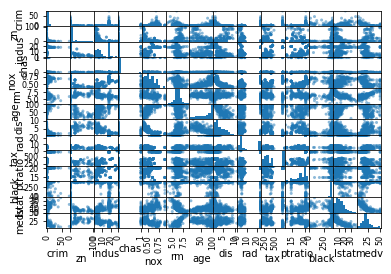

In [132]:
pd.plotting.scatter_matrix(bhd)
plt.show() #hard to read but shows some correlations and data splitting

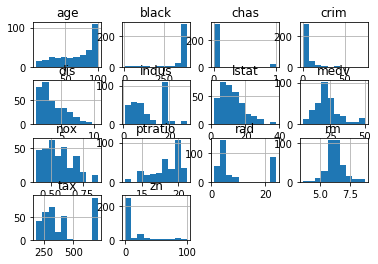

In [133]:
bhd.hist()
plt.show()

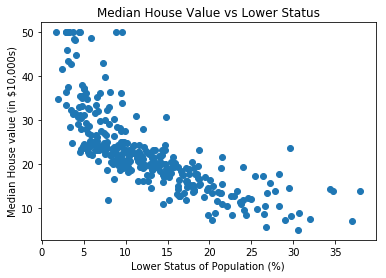

In [134]:
plt.scatter(bhd.lstat,bhd.medv)
plt.title('Median House Value vs Lower Status')
plt.xlabel('Lower Status of Population (%)')
plt.ylabel('Median House value (in $10,000s)')
plt.show()

Cheaper houses in lowers status neighbourhoods - to be expected


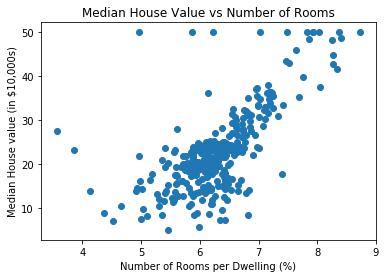

In [135]:
plt.scatter(bhd.rm,bhd.medv)
plt.title('Median House Value vs Number of Rooms')
plt.xlabel('Number of Rooms per Dwelling (%)')
plt.ylabel('Median House value (in $10,000s)')
plt.show()

big houses (with lots of rooms) are expensive - to be expected

In [136]:
bhd.zn.value_counts()

0.0      248
20.0      14
25.0       7
80.0       7
22.0       7
12.5       6
45.0       5
30.0       3
90.0       3
95.0       3
60.0       3
33.0       3
55.0       3
75.0       3
34.0       3
21.0       3
40.0       2
28.0       2
85.0       2
35.0       1
100.0      1
17.5       1
82.5       1
52.5       1
18.0       1
Name: zn, dtype: int64

can be be split into zero and non-zero values - large residential plots f

Split by Crime Rate

In [137]:
bhd.crim.describe()

count    333.000000
mean       3.360341
std        7.352272
min        0.006320
25%        0.078960
50%        0.261690
75%        3.678220
max       73.534100
Name: crim, dtype: float64

highly skewed data set, outliers go out to 73 but 75% of data below 3.6. Many neighbourhoods have a very low crime rate, there are some very high crime rate areas which appear as outliers ofr this variable.

In [138]:
bhd.sort_values(['crim']).tail(10) #bottom 4 scores stand out from the pack, 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
255,22.5971,0.0,18.1,0,0.700,5.000,89.5,1.5184,24,666,20.2,396.90,31.99,7.4
254,24.3938,0.0,18.1,0,0.700,4.652,100.0,1.4672,24,666,20.2,396.90,28.28,10.5
264,24.8017,0.0,18.1,0,0.693,5.349,96.0,1.7028,24,666,20.2,396.90,19.77,8.3
262,25.0461,0.0,18.1,0,0.693,5.987,100.0,1.5888,24,666,20.2,396.90,26.77,5.6
270,25.9406,0.0,18.1,0,0.679,5.304,89.1,1.6475,24,666,20.2,127.36,26.64,10.4
267,28.6558,0.0,18.1,0,0.597,5.155,100.0,1.5894,24,666,20.2,210.97,20.08,16.3
275,37.6619,0.0,18.1,0,0.679,6.202,78.7,1.8629,24,666,20.2,18.82,14.52,10.9
261,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
268,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
271,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8


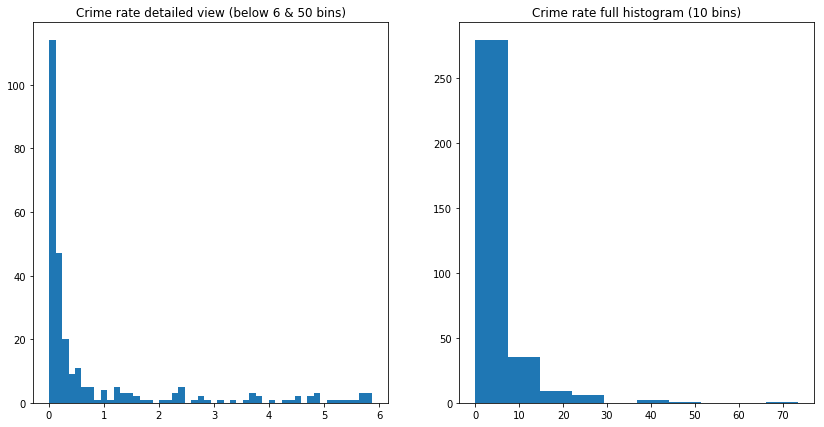

In [139]:
bhdcrimfig=plt.figure(figsize=(14,7))
ax1= bhdcrimfig.add_subplot(121)      
ax1.hist(bhd.crim[bhd.crim<6],bins =50)
ax1.set_title('Crime rate detailed view (below 6 & 50 bins)')
ax2=bhdcrimfig.add_subplot(122)
ax2.hist(bhd.crim)
ax2.set_title('Crime rate full histogram (10 bins)')
plt.show()

split dataset by crime rate above and below 1

In [140]:
bhdlowcrim=bhd.loc[bhd.crim<1]
bhdhighcrim=bhd.loc[bhd.crim>=1]
print('low crime:\n',bhdlowcrim.describe(),'\n','highcrime\n',bhdhighcrim.describe())

low crime:
              crim          zn       indus        chas         nox          rm  \
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
mean     0.190162   16.555814    7.694093    0.051163    0.492293    6.438981   
std      0.207554   26.458734    5.986247    0.220844    0.065747    0.638806   
min      0.006320    0.000000    0.740000    0.000000    0.385000    5.093000   
25%      0.053370    0.000000    3.970000    0.000000    0.437000    5.983000   
50%      0.111320    0.000000    6.090000    0.000000    0.489000    6.315000   
75%      0.235360   22.000000    9.900000    0.000000    0.538000    6.760000   
max      0.988430  100.000000   27.740000    1.000000    0.647000    8.725000   

              age         dis         rad         tax     ptratio       black  \
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
mean    56.492093    4.545132    4.441860  307.902326   18.000465  387.068930   
std     26.9761

In [141]:
print('differences in variable means(low-high)\n', bhdlowcrim.mean()-bhdhighcrim.mean())
print('difference in means over variable range(low-high)\n',(bhdlowcrim.mean()-bhdhighcrim.mean())/(bhd.max()-bhd.min()))
print('\ndifferences in variable medians(low-high)\n', bhdlowcrim.median()-bhdhighcrim.median())
print('difference in medians  over variable range(low-high)\n',(bhdlowcrim.median()-bhdhighcrim.median())/(bhd.max()-bhd.min()))
print('\ncomplete dataframe variable ranges\n',bhd.max()-bhd.min())

differences in variable means(low-high)
 crim        -8.946353
zn          16.555814
indus      -10.157602
chas        -0.025108
nox         -0.183012
rm           0.489236
age        -33.114687
dis          2.356957
rad        -14.651360
tax       -286.089200
ptratio     -1.263094
black       77.896134
lstat       -7.807828
medv         7.115656
dtype: float64
difference in means over variable range(low-high)
 crim      -0.121673
zn         0.165558
indus     -0.376207
chas      -0.025108
nox       -0.376568
rm         0.094740
age       -0.352284
dis        0.246011
rad       -0.637016
tax       -0.547016
ptratio   -0.146871
black      0.198007
lstat     -0.215448
medv       0.158126
dtype: float64

differences in variable medians(low-high)
 crim        -5.73671
zn           0.00000
indus      -12.01000
chas         0.00000
nox         -0.19000
rm           0.23850
age        -37.85000
dis          2.09330
rad        -20.00000
tax       -370.00000
ptratio     -1.90000
black       18.

high crim areas have more industry, higher pollution levels (related?), older houses (less home building?),lower pupil to teacher ratios, distance to radial highways (less desirable suburbs?)

In [142]:
print('low crime:\n',bhdlowcrim.medv.describe(),'\n','highcrime\n',bhdhighcrim.medv.describe())

low crime:
 count    215.000000
mean      25.290233
std        7.937310
min        8.100000
25%       19.950000
50%       23.300000
75%       29.050000
max       50.000000
Name: medv, dtype: float64 
 highcrime
 count    118.000000
mean      18.174576
std        9.517839
min        5.000000
25%       12.700000
50%       16.200000
75%       21.400000
max       50.000000
Name: medv, dtype: float64


sginificant differences in meand and median house prices. low crime rate areas have a mean value of 25.3 and a median of 23.3 and high crime areas have a mean of 18.2 and median of 16.2
areas of high crime have notably lower property values (may seem obvious...)

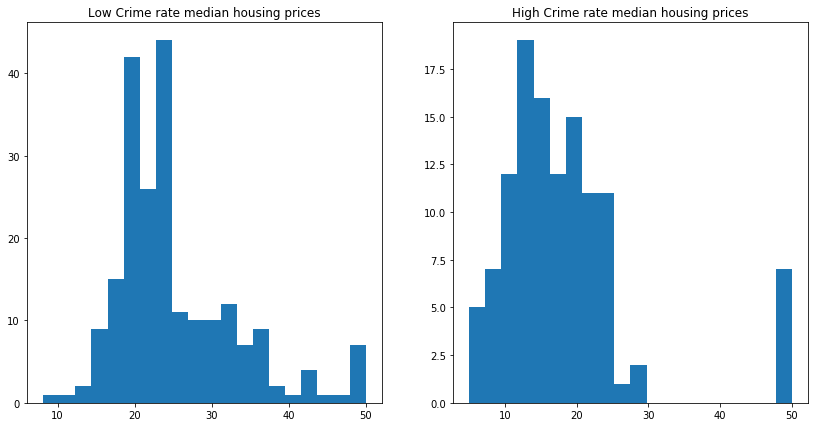

In [143]:
bhdcrimmedv=plt.figure(figsize=(14,7))
ax1= bhdcrimmedv.add_subplot(121)      
ax1.hist(bhdlowcrim.medv,bins =20)
ax1.set_title('Low Crime rate median housing prices')
ax2=bhdcrimmedv.add_subplot(122)
ax2.hist(bhdhighcrim.medv,bins=20)
ax2.set_title('High Crime rate median housing prices')
plt.show()

In [144]:
bhdhighcrim[bhdhighcrim.medv>30] #outliers

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
109,1.46336,0.0,19.58,0,0.605,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
110,1.51902,0.0,19.58,1,0.605,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
113,2.01019,0.0,19.58,0,0.605,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
243,4.89822,0.0,18.10,0,0.631,4.970,100.0,1.3325,24,666,20.2,375.52,3.26,50.0
244,6.53876,0.0,18.10,1,0.631,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0
245,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0
246,8.26725,0.0,18.10,1,0.668,5.875,89.6,1.1296,24,666,20.2,347.88,8.88,50.0


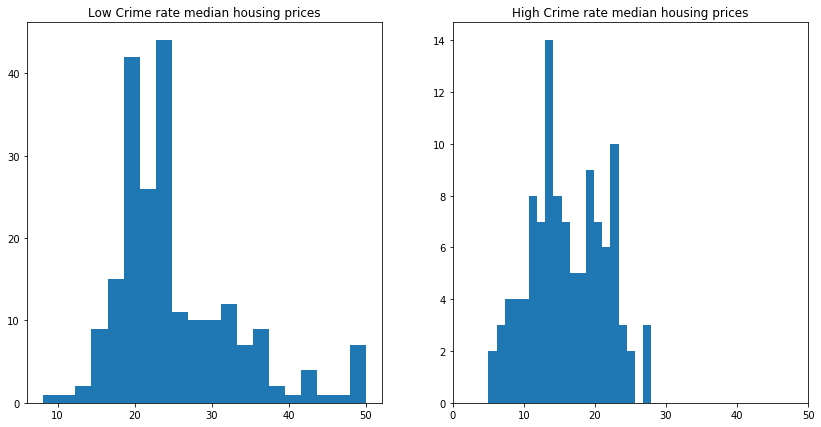

In [145]:
bhdcrimmedv=plt.figure(figsize=(14,7))
ax1= bhdcrimmedv.add_subplot(121)      
ax1.hist(bhdlowcrim.medv,bins =20)
ax1.set_title('Low Crime rate median housing prices')
ax2=bhdcrimmedv.add_subplot(122)
ax2.hist(bhdhighcrim[bhdhighcrim.medv<40]['medv'],bins=20)
ax2.set_title('High Crime rate median housing prices')
ax2.set_xlim(0,50)
plt.show()

Split By Charles River Adjacent

In [146]:
bhdchas0=bhd[bhd['chas']==0]
bhdchas1=bhd[bhd['chas']==1]
bhdchas0=bhdchas0.drop(columns='chas')
bhdchas1=bhdchas1.drop(columns='chas')
print(f'DataFrame info for areas NOT ON Charles River\n{bhdchas0.info()}' )
print(f'DataFrame info for areas ON Charles River\n {bhdchas1.info()}')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 0 to 332
Data columns (total 13 columns):
crim       313 non-null float64
zn         313 non-null float64
indus      313 non-null float64
nox        313 non-null float64
rm         313 non-null float64
age        313 non-null float64
dis        313 non-null float64
rad        313 non-null int64
tax        313 non-null int64
ptratio    313 non-null float64
black      313 non-null float64
lstat      313 non-null float64
medv       313 non-null float64
dtypes: float64(11), int64(2)
memory usage: 34.2 KB
DataFrame info for areas NOT ON Charles River
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 97 to 246
Data columns (total 13 columns):
crim       20 non-null float64
zn         20 non-null float64
indus      20 non-null float64
nox        20 non-null float64
rm         20 non-null float64
age        20 non-null float64
dis        20 non-null float64
rad        20 non-null int64
tax        20 non-null int64


In [147]:
bhdchas1

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
97,3.32105,0.0,19.58,0.8710,5.403,100.0,1.3216,5,403,14.7,396.90,26.82,13.4
104,1.41385,0.0,19.58,0.8710,6.129,96.0,1.7494,5,403,14.7,321.02,15.12,17.0
108,1.27346,0.0,19.58,0.6050,6.250,92.6,1.7984,5,403,14.7,338.92,5.50,27.0
110,1.51902,0.0,19.58,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
145,0.13587,0.0,10.59,0.4890,6.064,59.1,4.2392,4,277,18.6,381.32,14.66,24.4
146,0.37578,0.0,10.59,0.4890,5.404,88.6,3.6650,4,277,18.6,395.24,23.98,19.3
149,0.04560,0.0,13.89,0.5500,5.888,56.0,3.1121,5,276,16.4,392.80,13.51,23.3
150,0.40771,0.0,6.20,0.5070,6.164,91.3,3.0480,8,307,17.4,395.24,21.46,21.7
151,0.62356,0.0,6.20,0.5070,6.879,77.7,3.2721,8,307,17.4,390.39,9.93,27.5
161,0.44791,0.0,6.20,0.5070,6.726,66.5,3.6519,8,307,17.4,360.20,8.05,29.0


very small sample size comparatively - just 20 

In [148]:

print(f'DataFrame description for areas NOT ON Charles River\n{bhdchas0.describe()}' )
print(f'DataFrame description for areas ON Charles River\n {bhdchas1.describe()}')

DataFrame description for areas NOT ON Charles River
             crim          zn       indus         nox          rm         age  \
count  313.000000  313.000000  313.000000  313.000000  313.000000  313.000000   
mean     3.436787   10.829073   11.227252    0.554815    6.245674   67.741534   
std      7.544289   22.754198    7.032974    0.112555    0.693026   28.400933   
min      0.006320    0.000000    0.740000    0.385000    3.561000    6.000000   
25%      0.078750    0.000000    4.950000    0.453000    5.879000   43.700000   
50%      0.245220    0.000000    9.690000    0.538000    6.185000   76.500000   
75%      3.678220   12.500000   18.100000    0.624000    6.563000   93.800000   
max     73.534100  100.000000   27.740000    0.871000    8.725000  100.000000   

              dis         rad         tax     ptratio       black       lstat  \
count  313.000000  313.000000  313.000000  313.000000  313.000000  313.000000   
mean     3.750853    9.616613  410.220447   18.515974  

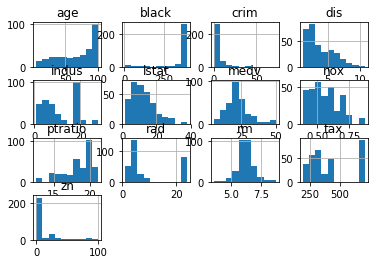

In [149]:
bhdchas0.hist()

plt.show()

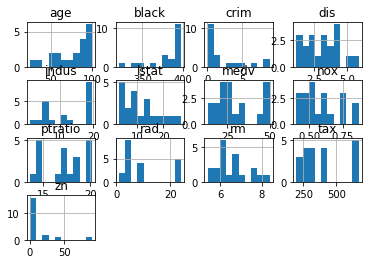

In [150]:
bhdchas1.hist()

plt.show()

In [151]:
print('differences in variable means(No-yes)\n', bhdchas0.mean()-bhdchas1.mean())
print('difference in means over variable range(no-yes)\n',(bhdchas0.mean()-bhdchas1.mean())/(bhd.max()-bhd.min()))
print('\ndifferences in variable medians(no-yes)\n', bhdchas0.median()-bhdchas1.median())
print('difference in medians  over variable range(no-yes)\n',(bhdchas0.median()-bhdchas1.median())/(bhd.max()-bhd.min()))
print('\ncomplete dataframe variable ranges\n',bhd.max()-bhd.min())

differences in variable means(No-yes)
 crim        1.272814
zn          2.329073
indus      -1.102748
nox        -0.038780
rm         -0.332076
age        -8.073466
dis         0.681313
rad        -0.283387
tax        15.670447
ptratio     1.130974
black     -22.570489
lstat       1.486728
medv       -7.879473
dtype: float64
difference in means over variable range(no-yes)
 age       -0.085888
black     -0.057373
chas            NaN
crim       0.017311
dis        0.071113
indus     -0.040843
lstat      0.041025
medv      -0.175099
nox       -0.079794
ptratio    0.131509
rad       -0.012321
rm        -0.064306
tax        0.029963
zn         0.023291
dtype: float64

differences in variable medians(no-yes)
 crim       -0.32685
zn          0.00000
indus      -2.55000
nox         0.00950
rm         -0.13750
age        -9.50000
dis         0.01225
rad         0.00000
tax        23.00000
ptratio     1.70000
black       1.65000
lstat       1.48500
medv       -4.85000
dtype: float64
difference i

Split by Radial Highway Accessability

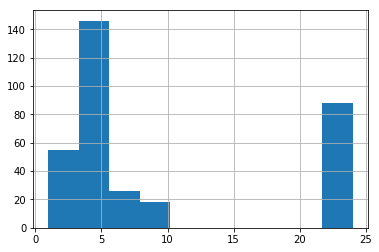

In [152]:
bhd.rad.hist() 

In [153]:
bhd['rad'].value_counts()

24    88
5     76
4     70
3     27
8     18
2     14
1     14
7     13
6     13
Name: rad, dtype: int64

In [154]:
bhdhighrad=bhd[bhd['rad']<15]
bhdlowrad=bhd[bhd['rad']>15]

In [155]:

print(f'DataFrame description for areas with LOW radial accessability index\n{bhdlowrad.describe()}' )
print(f'DataFrame description for areas with HIGH radial accessability index\n {bhdhighrad.describe()}')

DataFrame description for areas with LOW radial accessability index
            crim    zn         indus       chas        nox         rm  \
count  88.000000  88.0  8.800000e+01  88.000000  88.000000  88.000000   
mean   11.616404   0.0  1.810000e+01   0.056818   0.673875   5.922068   
std    10.559032   0.0  3.573073e-15   0.232822   0.062266   0.687750   
min     2.378570   0.0  1.810000e+01   0.000000   0.532000   3.561000   
25%     5.404117   0.0  1.810000e+01   0.000000   0.631000   5.597250   
50%     8.529685   0.0  1.810000e+01   0.000000   0.693000   6.113000   
75%    13.620000   0.0  1.810000e+01   0.000000   0.713000   6.383750   
max    73.534100   0.0  1.810000e+01   1.000000   0.770000   7.393000   

              age        dis   rad    tax       ptratio       black  \
count   88.000000  88.000000  88.0   88.0  8.800000e+01   88.000000   
mean    89.013636   2.134557  24.0  666.0  2.020000e+01  300.627386   
std     13.428766   0.634788   0.0    0.0  3.573073e-15  139.

low radial accessability group has some distinct features. tax variable = 666, ptr = 20.2 indus = 18.1 zn = 0
poor schools, lots of industry, no zoning for suburban sprawl ~1/2 acre blocks
also notable low accessability group has higher crime rate mean and median and range and higher % of low status pop. mean and median and lower housing median value mean and median

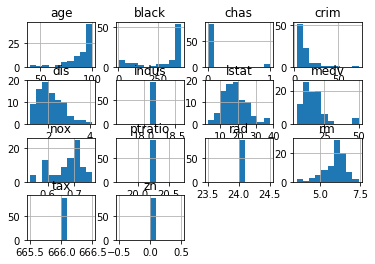

In [156]:
bhdlowrad.hist()
plt.show()

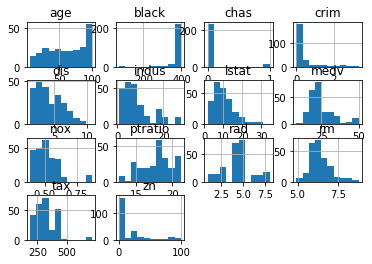

In [157]:
bhdhighrad.hist()
plt.show()

In [158]:
print('differences in variable means(high-low)\n', bhdhighrad.mean()-bhdlowrad.mean())
print('difference in means over variable range(high-low)\n',(bhdhighrad.mean()-bhdlowrad.mean())/(bhd.max()-bhd.min()))
print('\ndifferences in variable medians(high-low)\n', bhdhighrad.median()-bhdlowrad.median())
print('difference in medians  over variable range(high-low)\n',(bhdhighrad.median()-bhdlowrad.median())/(bhd.max()-bhd.min()))
print('\ncomplete dataframe variable ranges\n',bhd.max()-bhd.min())

differences in variable means(high-low)
 crim       -11.221505
zn          14.528571
indus       -9.251306
chas         0.004406
nox         -0.158659
rm           0.466948
age        -28.253636
dis          2.141226
rad        -19.526531
tax       -348.930612
ptratio     -2.381224
black       79.972614
lstat       -7.941829
medv         7.763590
dtype: float64
difference in means over variable range(high-low)
 crim      -0.152616
zn         0.145286
indus     -0.342641
chas       0.004406
nox       -0.326458
rm         0.090424
age       -0.300571
dis        0.223494
rad       -0.848980
tax       -0.667171
ptratio   -0.276887
black      0.203286
lstat     -0.219145
medv       0.172524
dtype: float64

differences in variable medians(high-low)
 crim        -8.393265
zn           0.000000
indus      -11.690000
chas         0.000000
nox         -0.189000
rm           0.136000
age        -31.300000
dis          1.911250
rad        -20.000000
tax       -362.000000
ptratio     -2.300000
blac

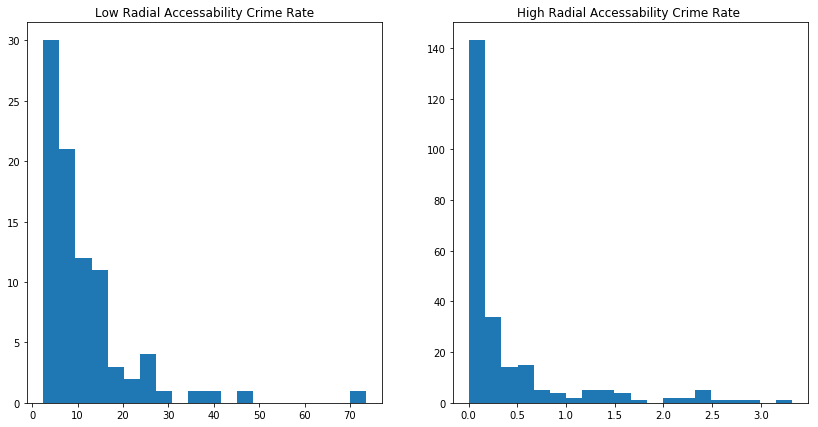

In [159]:
bhdradcrim=plt.figure(figsize=(14,7))
ax1= bhdradcrim.add_subplot(121)      
ax1.hist(bhdlowrad.crim,bins =20)
ax1.set_title('Low Radial Accessability Crime Rate')
ax2=bhdradcrim.add_subplot(122)
ax2.hist(bhdhighrad.crim,bins=20)
ax2.set_title('High Radial Accessability Crime Rate ')
plt.show()
#note differences in scale!

<function matplotlib.pyplot.show(*args, **kw)>

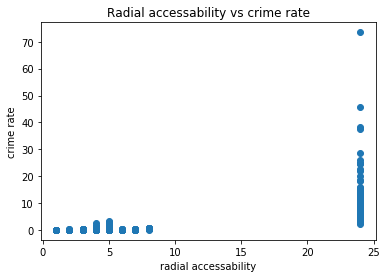

In [160]:
plt.scatter(bhd.rad,bhd.crim)
plt.title('Radial accessability vs crime rate')
plt.ylabel('crime rate')
plt.xlabel('radial accessability')
plt.show

lower left corner is high acessability right side column is low accessability

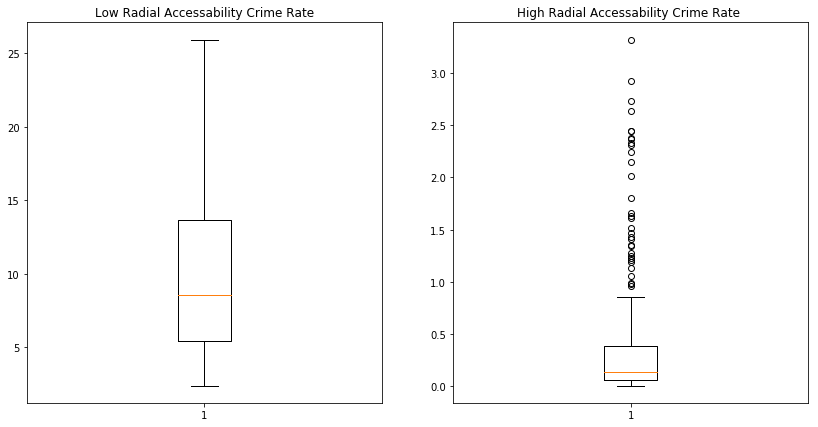

In [164]:
bhdradcrimbox=plt.figure(figsize=(14,7))
ax1= bhdradcrimbox.add_subplot(121)      
ax1.boxplot(bhdlowrad.crim, showfliers=False)
ax1.set_title('Low Radial Accessability Crime Rate')
ax2=bhdradcrimbox.add_subplot(122)
ax2.boxplot(bhdhighrad.crim)
ax2.set_title('High Radial Accessability Crime Rate ')
plt.show()
#note the differences in scale!

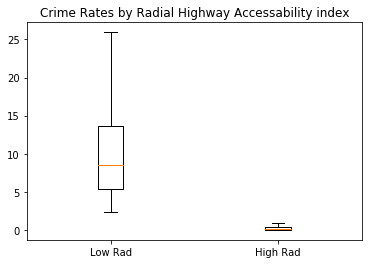

In [169]:
plt.boxplot([bhdlowrad.crim,bhdhighrad.crim], showfliers=False)
plt.title('Crime Rates by Radial Highway Accessability index')
plt.xticks([1,2],['Low Rad','High Rad'])
plt.show()

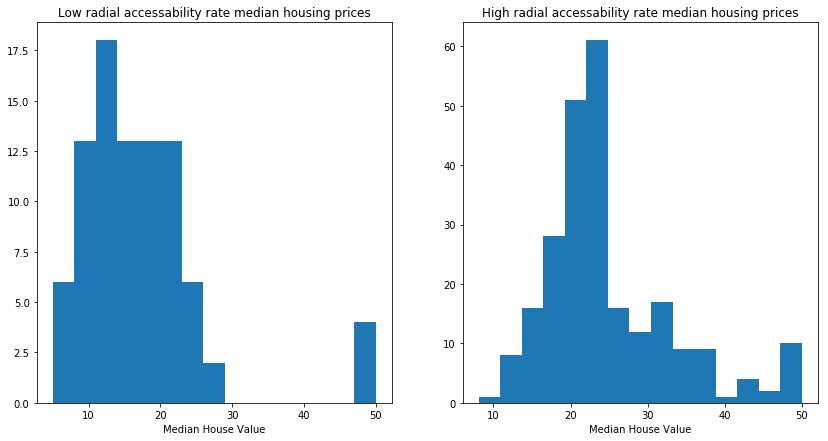

In [162]:
bhdradmedv=plt.figure(figsize=(14,7))
ax1= bhdradmedv.add_subplot(121)      
ax1.hist(bhdlowrad.medv,bins =15)
ax1.set_title('Low radial accessability rate median housing prices')
ax1.set_ylim
ax1.set_xlabel('Median House Value')
ax2=bhdradmedv.add_subplot(122)
ax2.hist(bhdhighrad.medv,bins=15)
ax2.set_title('High radial accessability rate median housing prices')
ax2.set_xlabel('Median House Value')
plt.show()

low rad group has much lower peak at around 15 distribution from 0-30 (outliers at 50), high rad group has higher peak at 25